<a href="https://colab.research.google.com/github/samz5320/close-price-predictions/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [50]:
df=web.DataReader("AAPL",data_source='yahoo',start="2012-01-01",end="2021-04-07")

In [51]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-31,123.519997,121.150002,121.650002,122.150002,118323800.0,122.150002
2021-04-01,124.180000,122.489998,123.660004,123.000000,74957400.0,123.000000
2021-04-05,126.160004,123.070000,123.870003,125.900002,88651200.0,125.900002


In [52]:
df.shape

(2330, 6)

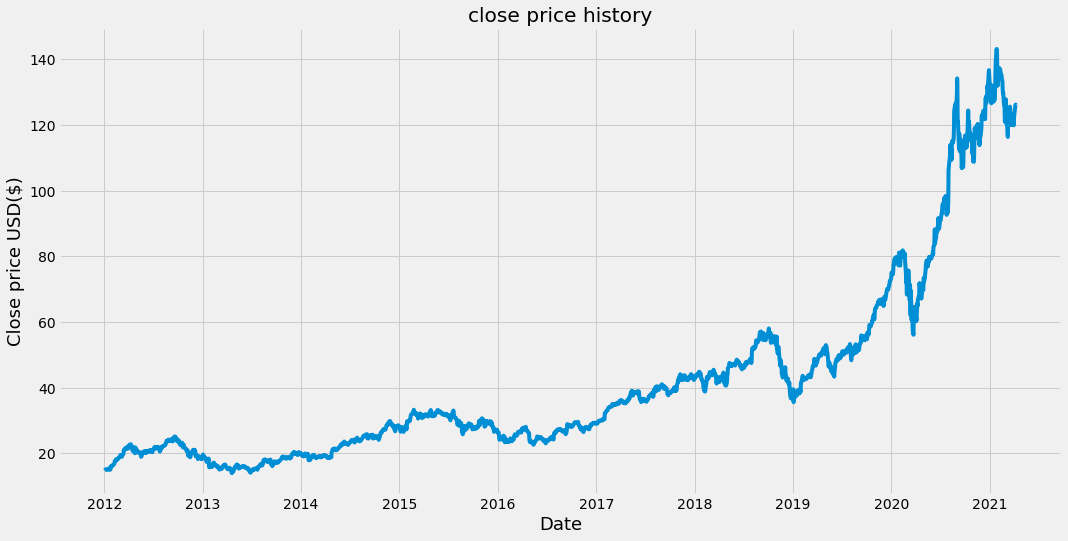

In [53]:
plt.figure(figsize=(16,8))
plt.title("close price history")
plt.plot(df.Close)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close price USD($)",fontsize=18)
plt.show()

In [54]:
#creat a df with only close column
data=df.filter(["Close"])
#convert df to np
dataset=data.values
#get he number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1864

In [55]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

print(scaled_data.shape)
scaled_data

(2330, 1)


array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.86642158],
       [0.86882071],
       [0.86767145]])

In [56]:
#create the training data set
#create the scaled trarining data set
train_data=scaled_data[0:training_data_len, : ]
#split into x_train y_train datsets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [58]:
#convert to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [62]:
#reshape data
x_train.shape
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1804, 60, 1)

In [64]:
#build lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [68]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
#train model
model.fit(x_train,y_train,batch_size=1,epochs=1)



1804/1804 [==============================] - 43s 22ms/step - loss: 6.5284e-04


In [84]:
#create tets datset
#create new array containing scaled values from index 1804
test_data=scaled_data[training_data_len -60 :, :]
#create the data sets x_test,y_test 
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [85]:
#convert data into numpy
x_test=np.array(x_test)


In [86]:
#reshape data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [87]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [88]:
#evaluate model by getting the rmse
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.499015382431096

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


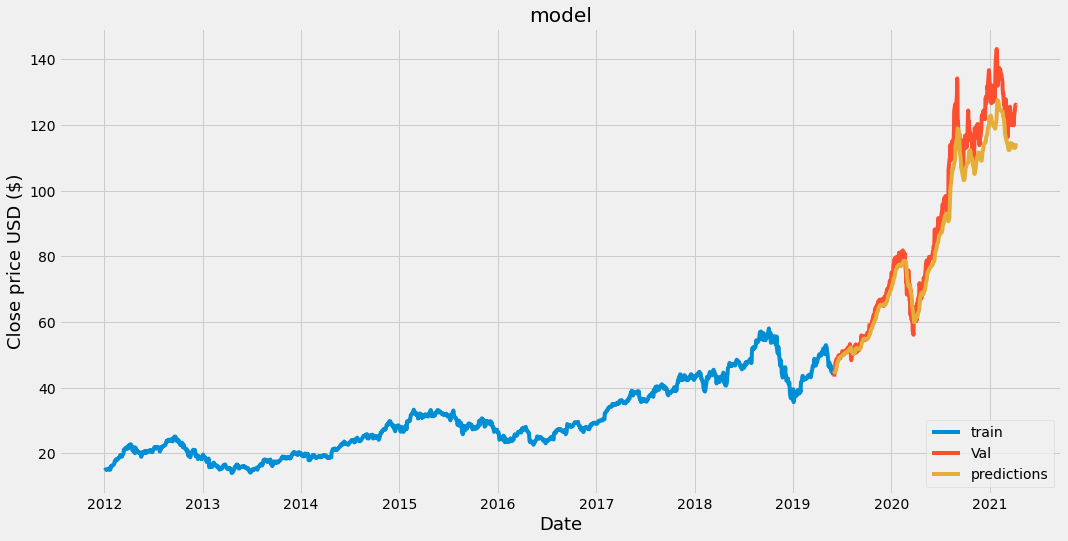

In [90]:
#plot data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#plot the data
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close price USD ($)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','Val','predictions'],loc='lower right')
plt.show()

In [91]:
#show actual and predicted prices
valid

,Close,predictions
Date,,
2019-06-03,43.325001,45.036823
2019-06-04,44.910000,44.746910
2019-06-05,45.634998,44.628078
2019-06-06,46.305000,44.689186
2019-06-07,47.537498,44.913956
...,...,...
2021-03-31,122.150002,112.995247
2021-04-01,123.000000,112.961594
2021-04-05,125.900002,113.133423


In [95]:
#get quote
apple_quote=web.DataReader("AAPL",data_source='yahoo',start=('2012-01-01'),end=("2021-04-07"))
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day close price values and convert the dataframe to  array
last_60_days=new_df[-60:].values
#scale data to be values btw 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
#append past 60 days to X_test list
X_test.append(last_60_days_scaled)
#convert X_test to np array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[115.24828]]


In [96]:
#get eh quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start=("2021-04-07"),end=('2021-04-07'))
print(apple_quote['Close'])

Date
2021-04-07    126.929901
Name: Close, dtype: float64
